**Predictive analysis for Cycling duration using Power, Elevation gain and Distance as the inputs**

### 1. Import Libraries

First, we'll import the necessary libraries for data manipulation, model building, and visualization.

In [32]:
# We start by loading all the necessary libraries which will be used in this file
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

### 2. Load and Prepare the Data

In [63]:
# Define the path to the CSV file
file_path = '/content/cycling_data_with_ftp.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Athlete Weight,...,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr,ftp_values
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,84.0,...,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0,114.760
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,84.0,...,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0,115.995
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,84.0,...,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0,121.125
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,84.0,...,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0,132.715
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,80.0,...,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0,113.430


### 3. Inspect the Data
After loading the data, we can check for any missing values and understand the basic structure of the dataset.

In [64]:
# Check the data types and missing values
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())
# Define features and target variable
X = data[['Elevation Gain', 'Distance', 'Power Count']]
y = data['ftp_values']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                181 non-null    int64  
 1   Activity Date              181 non-null    object 
 2   Activity Name              181 non-null    object 
 3   Activity Type              181 non-null    object 
 4   Elapsed Time               181 non-null    int64  
 5   Distance                   181 non-null    float64
 6   Max Heart Rate             181 non-null    float64
 7   Relative Effort            181 non-null    float64
 8   Commute                    181 non-null    bool   
 9   Athlete Weight             181 non-null    float64
 10  Bike Weight                181 non-null    float64
 11  Moving Time                181 non-null    float64
 12  Max Speed                  181 non-null    float64
 13  Average Speed              181 non-null    float64

### 4. Split the Data
Split the data into training and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Train Different Models





**Linear Regression**

It is a fundamental and widely used statistical technique in data analysis and machine learning. It models the relationship between a dependent variable and one or more independent variables using a linear equation.

It aims to predict the value of a dependent variable
Y based on the values of one or more independent variables
X. The relationship is represented by a linear equation, which is essentially a straight line in the simplest case of one independent variable.

In [23]:
# Create and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate RMSE
rmse_lr = np.sqrt(mse_lr)

# Calculate R-squared
r2_lr = r2_score(y_test, y_pred_lr)

# Print out the key metrics with rounding
print(f"Linear Regression - RMSE: {round(rmse_lr, 4)}")
print(f"Linear Regression - R2: {round(r2_lr, 4)}")

Linear Regression - RMSE: 34.2585
Linear Regression - R2: -0.2042


**Random Forest**

It is a versatile and powerful machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that builds multiple decision trees and merges their outputs to improve the overall model's performance.

Random Forest is an ensemble learning method that creates a "forest" of decision trees, typically trained with the "bagging" method, where each tree is built using a randomly selected subset of the training data and features. The final prediction of the Random Forest model is made by aggregating the predictions of all individual trees in the forest.

In [28]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {round(rmse_rf,4)}")
print(f"Random Forest - R2: {round(r2_rf,4)}")

Random Forest - RMSE: 28.1382
Random Forest - R2: 0.1876


**Gradient Boosting**

It is a machine learning technique used for both classification and regression tasks that builds models sequentially to correct the errors of previous models. It is an ensemble method that combines the predictions of several base models (usually decision trees) to produce a stronger and more accurate model.

It is an iterative algorithm that builds a series of models, where each new model attempts to correct the residual errors made by the previous models. It uses gradient descent to minimize the loss function and improve the model’s performance.

In [29]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - RMSE: {round(rmse_gb,4)}")
print(f"Gradient Boosting - R2: {round(r2_gb,4)}")


Gradient Boosting - RMSE: 27.8855
Gradient Boosting - R2: 0.2021


**Decision Tree**

It is a supervised learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences, including chance event outcomes, resource costs, and utility. The model resembles a tree structure, where each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents a final decision or prediction.

It is a flowchart-like tree structure where internal nodes represent tests or decisions on features, branches represent the outcomes of these tests, and leaf nodes represent the final prediction or output. The tree is built by recursively splitting the data into subsets based on the feature that provides the best split according to a chosen criterion.

In [30]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - RMSE: {round(rmse_dt,4)}")
print(f"Decision Tree - R2: {round(r2_dt,4)}")

Decision Tree - RMSE: 31.3275
Decision Tree - R2: -0.007


**K-Nearest Neighbors (KNN)**

It is a supervised learning algorithm used for both classification and regression tasks. It is a simple, instance-based learning method that makes predictions based on the closest training examples in the feature space.

It is an algorithm that classifies a data point or predicts a value based on the labels or values of its k nearest neighbors in the training dataset. The distance metric used to determine "closeness" is typically Euclidean distance, though other distance metrics can be used.

In [31]:
# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - RMSE: {round(rmse_knn,4)}")
print(f"K-Nearest Neighbors - R2: {round(r2_knn,4)}")

K-Nearest Neighbors - RMSE: 31.4705
K-Nearest Neighbors - R2: -0.0162


**Support Vector Regression (SVR)**

It is a type of Support Vector Machine (SVM) used for regression tasks. It is designed to predict continuous values and is particularly useful for datasets with complex relationships between features and target values.

It is a regression technique that extends the principles of Support Vector Machines (SVM) from classification to regression. SVR aims to find a function that approximates the target values of the data while being as flat as possible, subject to a margin of tolerance within which errors are allowed.

In [33]:
# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - RMSE: {round(rmse_svr,4)}")
print(f"Support Vector Regression - R2: {round(r2_svr,4)}")

Support Vector Regression - RMSE: 30.0192
Support Vector Regression - R2: 0.0754


**XGBoost Regression**

It refers to the use of the XGBoost (Extreme Gradient Boosting) algorithm for regression tasks. XGBoost is an advanced machine learning technique that builds upon the principles of gradient boosting to offer improved performance and efficiency. It is widely used for predictive modeling and is known for its speed, accuracy, and handling of large datasets.

It is a specific application of the XGBoost algorithm for predicting continuous values. It leverages the gradient boosting framework, where multiple decision trees are built sequentially to correct the errors of the previous trees and aggregate their predictions.

In [34]:
# XGBoost Regression
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - RMSE: {round(rmse_xgb,4)}")
print(f"XGBoost Regression - R2: {round(r2_xgb,4)}")

XGBoost Regression - RMSE: 37.1064
XGBoost Regression - R2: -0.4128


**Explanation of Model Comparison Using Actual vs Predicted and Residuals**

The "Actual vs Predicted" plot is a scatter plot that compares the actual target values (cycling durations in your case) with the predicted values from each regression model. This type of plot is useful for evaluating the performance of the models visually.

The "Residuals" plot is a histogram that shows the distribution of residuals, which are the differences between the actual values and the predicted values. Residuals give insight into how well a model performs by measuring the errors in its predictions.

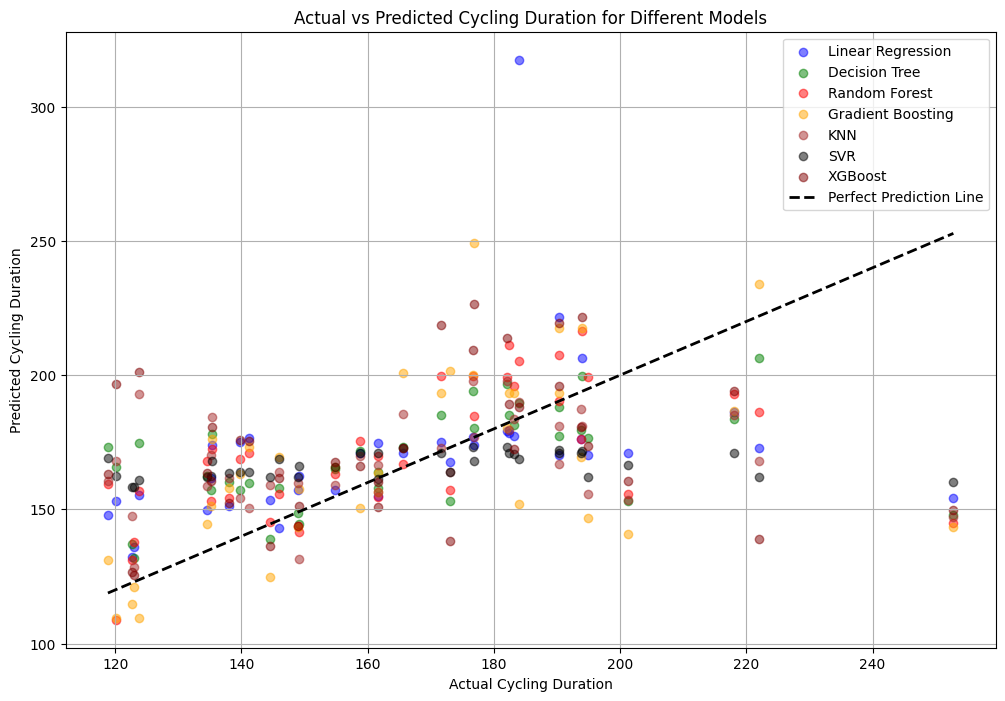

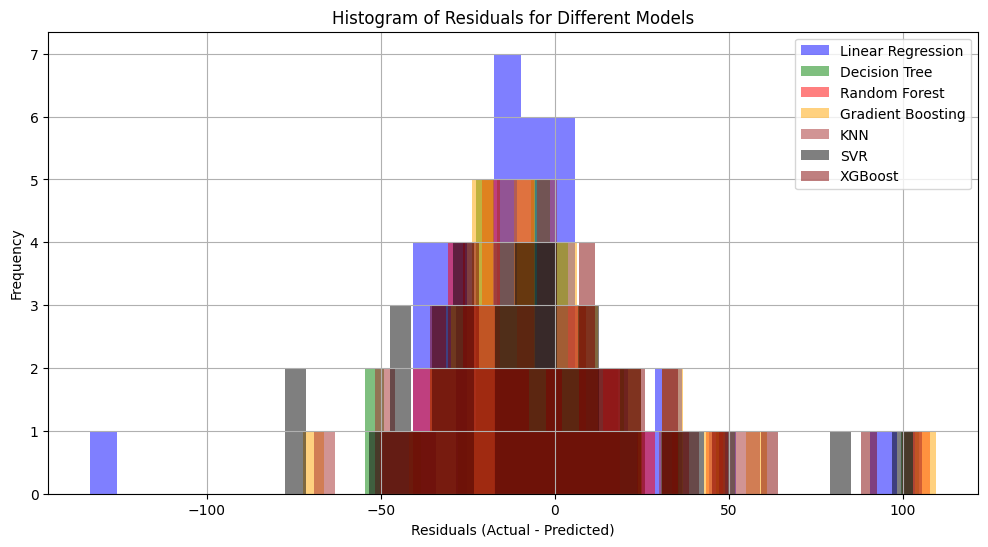

In [52]:
# Scatter plot of Actual vs Predicted Cycling Duration for Different Models
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Decision Tree')
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='red', label='Random Forest')
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='orange', label='Gradient Boosting')
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='brown', label='KNN')
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='black', label='SVR')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='maroon', label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Cycling Duration')
plt.ylabel('Predicted Cycling Duration')
plt.title('Actual vs Predicted Cycling Duration for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Calculate residuals for each model
residuals_linear = y_test - y_pred_lr
residuals_tree = y_test - y_pred_rf
residuals_rf = y_test - y_pred_gb
residuals_gb = y_test - y_pred_dt
residuals_knn = y_test - y_pred_knn
residuals_xgb = y_test - y_pred_svr
residuals_svr = y_test - y_pred_xgb

# Histogram of Residuals for Different Models
plt.figure(figsize=(12, 6))
plt.hist(residuals_linear, bins=30, alpha=0.5, color='blue', label='Linear Regression')
plt.hist(residuals_tree, bins=30, alpha=0.5, color='green', label='Decision Tree')
plt.hist(residuals_rf, bins=30, alpha=0.5, color='red', label='Random Forest')
plt.hist(residuals_gb, bins=30, alpha=0.5, color='orange', label='Gradient Boosting')
plt.hist(residuals_knn, bins=30, alpha=0.5, color='brown', label='KNN')
plt.hist(residuals_svr, bins=30, alpha=0.5, color='black', label='SVR')
plt.hist(residuals_xgb, bins=30, alpha=0.5, color='maroon', label='XGBoost')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Different Models')
plt.legend()
plt.grid(True)
plt.show()

**Model Comparison**

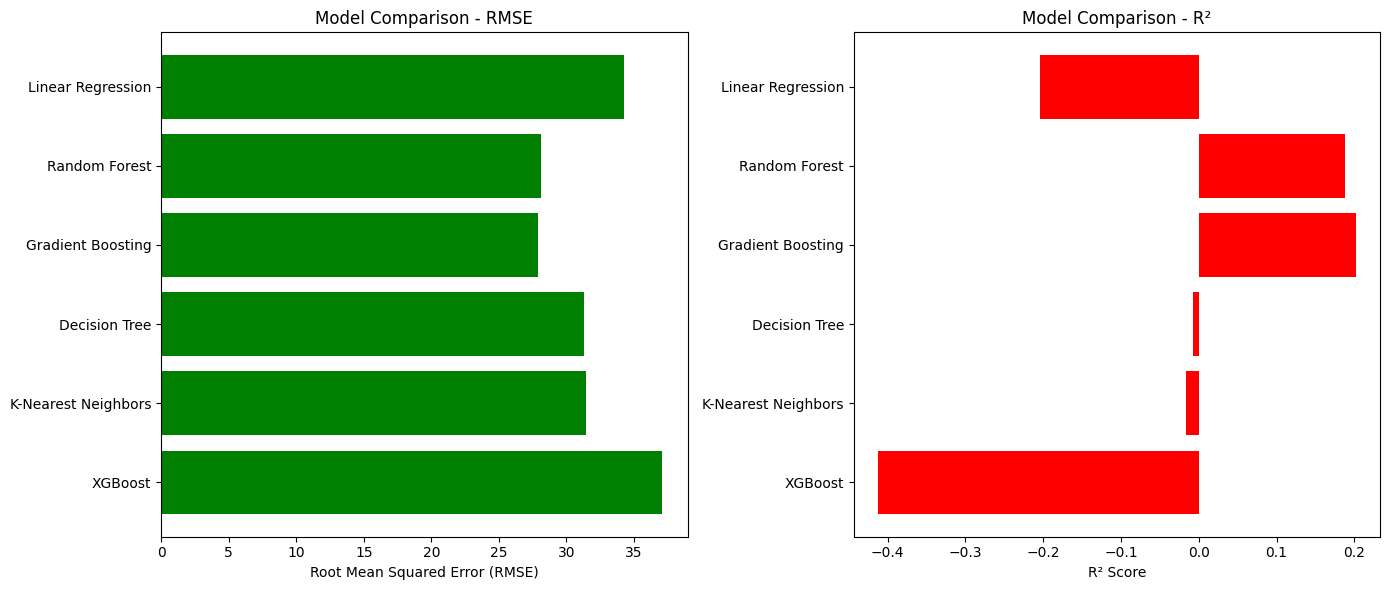

In [55]:
# Define model names
models = ['Linear Regression','Random Forest','Gradient Boosting','Decision Tree','K-Nearest Neighbors','XGBoost']

# Define RMSE and R² scores
rmse_scores = [rmse_lr,rmse_rf,rmse_gb,rmse_dt,rmse_knn,rmse_xgb]
r2_scores = [r2_lr,r2_rf,r2_gb,r2_dt,r2_knn,r2_xgb]
# Plot RMSE scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(models, rmse_scores, color='green')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison - RMSE')
plt.gca().invert_yaxis()  # Invert y-axis to show the lowest RMSE at the top

# Plot R² scores
plt.subplot(1, 2, 2)
plt.barh(models, r2_scores, color='red')
plt.xlabel('R² Score')
plt.title('Model Comparison - R²')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest R² at the top

plt.tight_layout()
plt.show()

In [66]:
# Evaluation metrics
linear_rmse = 34.2585
tree_rmse = 31.3275
rf_rmse = 28.1382
gb_rmse = 27.8855
knn_rmse = 31.4705
svr_rmse = 30.0192
xgb_rmse = 37.1064



linear_r2 = -0.2042
tree_r2 = -0.007
rf_r2 = 0.1876
gb_r2 = 0.2021
knn_r2 = -0.0162
svr_r2 = 0.0754
xgb_r2 = -0.4128

# Create a dictionary to store evaluation metrics
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN','Svr','xgb'],
    'RMSE': [linear_rmse, tree_rmse, rf_rmse, gb_rmse, knn_rmse, svr_rmse, xgb_rmse],
    'R2': [linear_r2, tree_r2, rf_r2, gb_r2, knn_r2, svr_r2,xgb_r2]
}
# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Save the DataFrame to a CSV file
metrics_df.to_csv('model_comparison_metrics.csv', index=False)

# Display the DataFrame for comparison
print(metrics_df)

               Model     RMSE      R2
0  Linear Regression  34.2585 -0.2042
1      Decision Tree  31.3275 -0.0070
2      Random Forest  28.1382  0.1876
3  Gradient Boosting  27.8855  0.2021
4                KNN  31.4705 -0.0162
5                Svr  30.0192  0.0754
6                xgb  37.1064 -0.4128


**Comparing the Performance Metrics for the models**

In this analysis, Gradient Boosting emerged as the top-performing model with the lowest RMSE (27.8855) and the highest R-squared (0.2021), indicating its superior accuracy and ability to explain the variance in cycling duration. While Linear Regression showed the highest RMSE (34.2585) and a negative R-squared (-0.2042), highlighting its limited effectiveness, Random Forest and Support Vector Regression also demonstrated moderate performance with lower RMSE values than some models but relatively low R-squared values. Overall, Gradient Boosting's strong predictive capabilities and better fit make it the most reliable model for accurately predicting cycling duration.